In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
import PIL
import PIL.Image

In [6]:
import cv2 as cv
import os

In [7]:
import pandas as pd

In [67]:
lines= open('combined/afternoon_apurve_1.txt', 'r').readlines()
data=[]
for line in lines:
    words= line.split(' ')
    row=[]
    for i in range(60):
        row.append(float(words[i]))
    data.append(row)

In [9]:
data=[]
labels=[]
train_dir="combined"
for _dir, subdir, files in os.walk(train_dir):
    for files in files:
        name=files.split('_')
        lines=open(os.path.join(os.path.abspath(_dir),files)).readlines()
        for line in lines:
            words= line.split(' ')
            row=[]
            for word in words:
                row.append(float(word))
            data.append(row)
            labels.append(name[0])


In [27]:
data=np.array(data)
print(data.shape)

(46, 60)


In [11]:
labels_dict={}
cnt=0
for i in range(len(labels)):
    if(labels[i] in labels_dict):
        labels[i]=int(labels_dict[labels[i]])
    else:
        labels_dict[labels[i]]=cnt
        labels[i]=cnt
        cnt+=1
labels=np.array(labels)        

In [64]:
def plot_skel(sample, angle):
    x=[]
    y=[]
    z=[]
    for i in range(len(data[sample])):
        if(i%3==0):
            x.append(data[sample][i])
        elif(i%3==2):
            y.append(data[sample][i])
        else:
            z.append(data[sample][i])
    x=np.array(x)
    y=np.array(y)
    z=np.array(z)
    bone_list=[[0,1],[1,2],[1,3],[2,4],[4,6],[6,8],[3,5],[5,7],[7,9],[1,10],[10,11],[11,12],[12,14],[14,16],[16,18],[11,13],[13,15],[15,17],[17,19]]
    ax=plt.axes(projection='3d')
    ax.scatter([-1,0],[2,3],[-1,1], 'gray')
    ax.scatter3D(x, y, z, zdir='z', s=20, c='b')
    for bone in bone_list:
        ax.plot([x[bone[0]], x[bone[1]]], [y[bone[0]], y[bone[1]]], [z[bone[0]], z[bone[1]]], 'red')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    if(angle==90):
        ax.view_init(0,90)
    elif(angle==30): 
        ax.view_init(30)

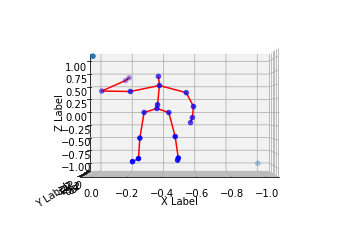

In [65]:
plot_skel(sample=15, angle=90)

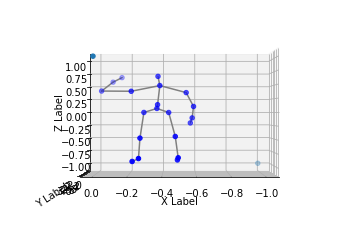

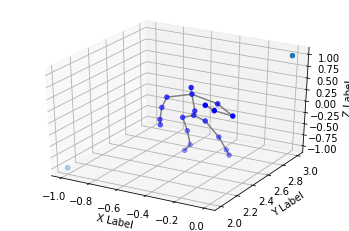

In [54]:
ax=plt.axes(projection='3d')
ax.scatter([-1,0],[2,3],[-1,1], 'gray')
ax.scatter3D(x, y, z, zdir='z', s=20, c='b')
# plot_3D_skel(ax)
for bone in bone_list:
        ax.plot([x[bone[0]], x[bone[1]]], [y[bone[0]], y[bone[1]]], [z[bone[0]], z[bone[1]]], 'grey')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(30)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
for i in range(len(data)):
    data[i]=(data[i]-np.min(data[i]))/(np.max(data[i])-np.min(data[i]))

In [21]:
X_train, X_test, Y_train, Y_test= train_test_split(data, labels, test_size=0.2)

In [22]:
# print(len(X_train))
# print(len(X_train[0]))
# print(len(X_train[0][0]))
# print(X_train.shape)
print(X_train.shape[1:])


(60,)


In [23]:
model= keras.Sequential([
    keras.layers.Input(shape=data.shape[1:]),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(30,activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=20)
test_loss, test_acc= model.evaluate(X_test, Y_test)
print("TEST ACCURACY: ", test_acc)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 160843 samples
Epoch 1/20
160843/160843 [==============================] - 40s 247us/sample - loss: 2.0896 - acc: 0.3105
Epoch 2/20
160843/160843 [==============================] - 39s 245us/sample - loss: 1.6212 - acc: 0.4328
Epoch 3/20
160843/160843 [==============================] - 43s 268us/sample - loss: 1.4740 - acc: 0.4769
Epoch 4/20
160843/160843 [==============================] - 57s 354us/sample - loss: 1.3703 - acc: 0.5125 - loss: 1.370
Epoch 5/20
160843/160843 [==============================] - 60s 375us/sample - loss: 1.2740 - acc: 0.5446
Epoch 6/20
160843/160843 [==============================] - 61s 380us/sample - loss: 1.1866 - acc: 0.5747
Epoch 7/20
160843/160843 [==============================] - 39s 240us/sample - loss: 1.1148 - acc: 0.6031
Epoch 8/20
160843/160843 [==============================] - 57s 351us/sample - loss: 1.0588 - acc: 0.6211
Epoch 9/20
160843/160843 [=======

In [66]:
print("TEST ACCURACY: ", test_acc)

TEST ACCURACY:  0.76342297


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7808      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3870      
Total params: 28,190
Trainable params: 28,190
Non-trainable params: 0
_________________________________________________________________
